In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.1"

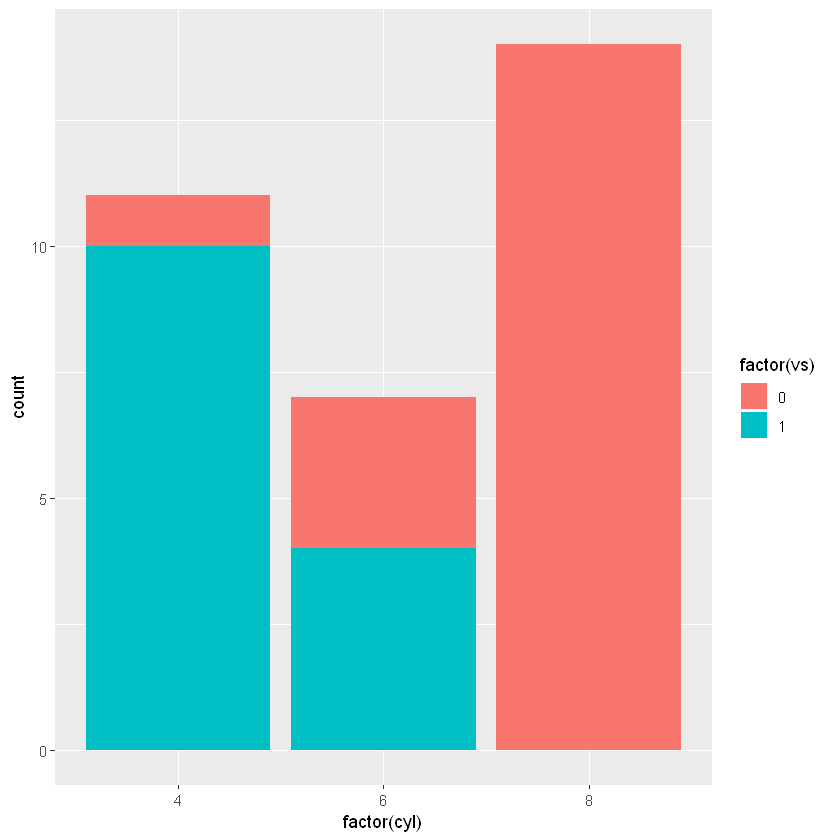

In [2]:
# Stacking and filling ------------------------------------------

# Stacking is the default behavior for most area plots.
# Fill makes it easier to compare proportions

ggplot(mtcars, aes(factor(cyl), fill = factor(vs))) +
  geom_bar()

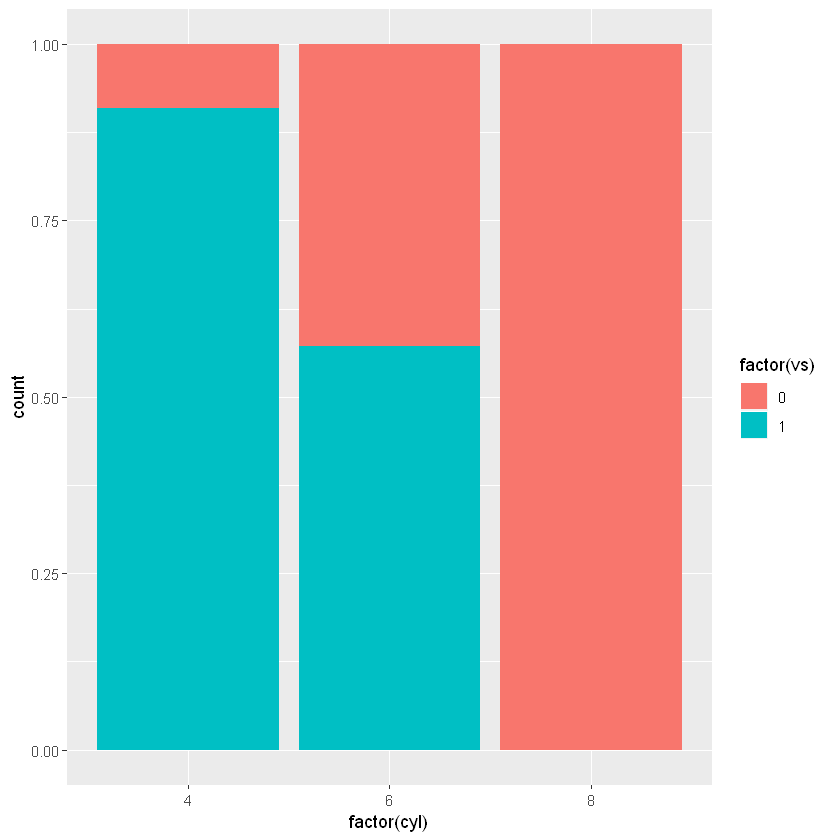

In [3]:
ggplot(mtcars, aes(factor(cyl), fill = factor(vs))) +
  geom_bar(position = "fill")

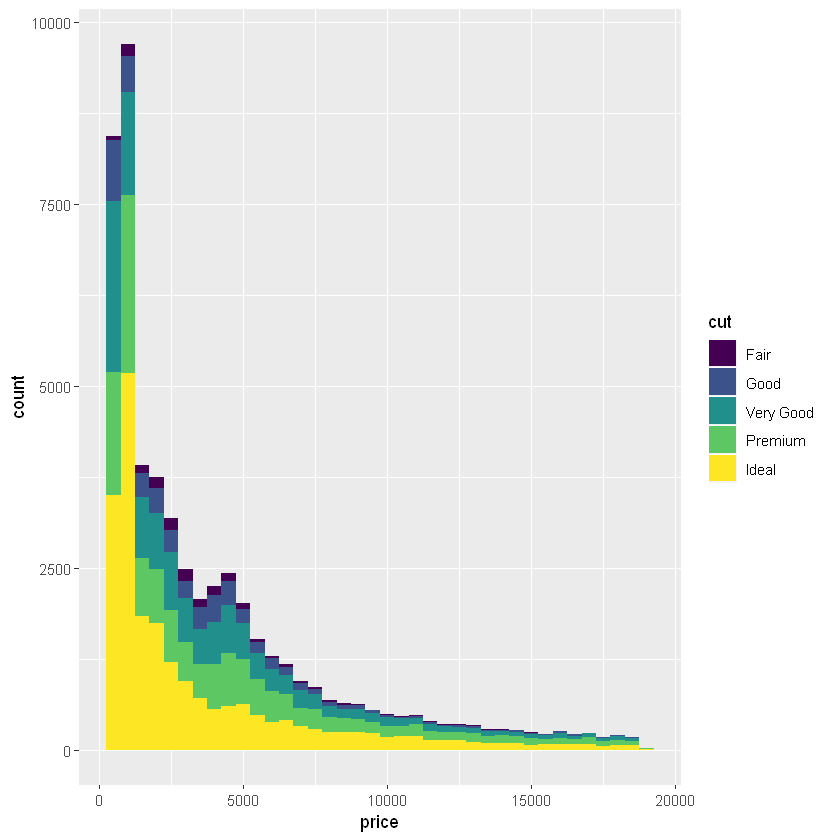

In [4]:
ggplot(diamonds, aes(price, fill = cut)) +
  geom_histogram(binwidth = 500)

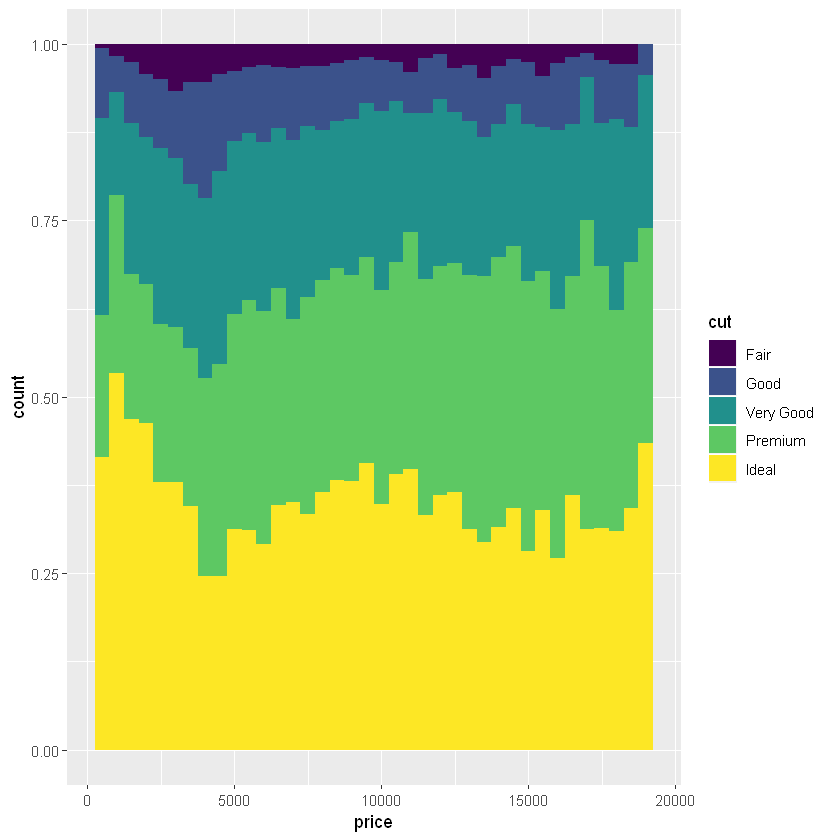

In [5]:
ggplot(diamonds, aes(price, fill = cut)) +
  geom_histogram(binwidth = 500, position = "fill")

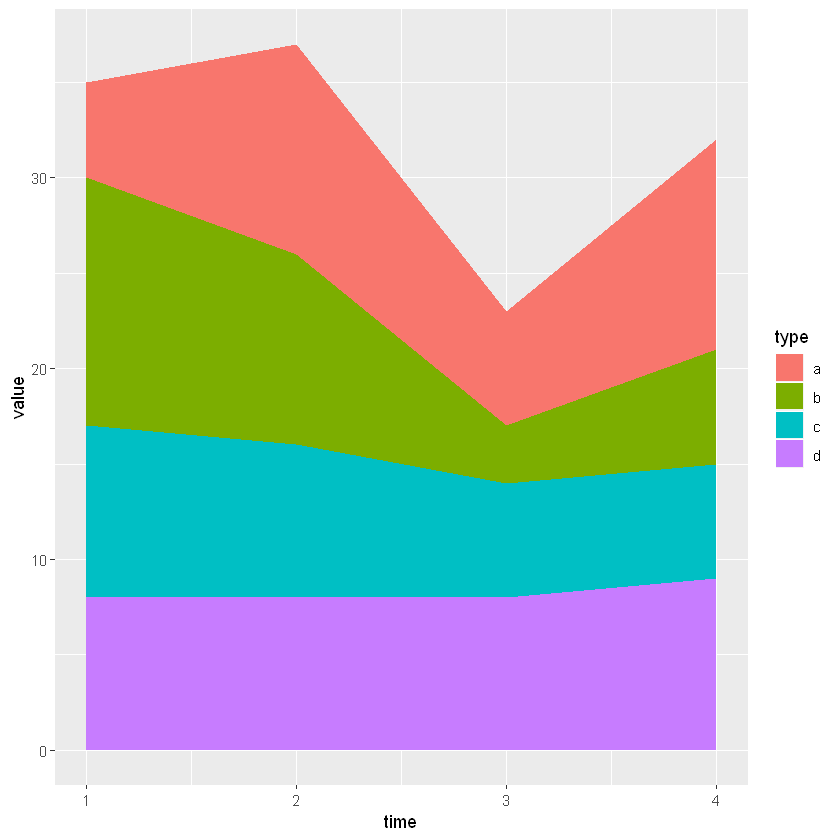

In [6]:
# Stacking is also useful for time series

series <- data.frame(
  time = c(rep(1, 4), rep(2, 4), rep(3, 4), rep(4, 4)),
  type = rep(c('a', 'b', 'c', 'd'), 4),
  value = rpois(16, 10)
)

ggplot(series, aes(time, value)) +
  geom_area(aes(fill = type))

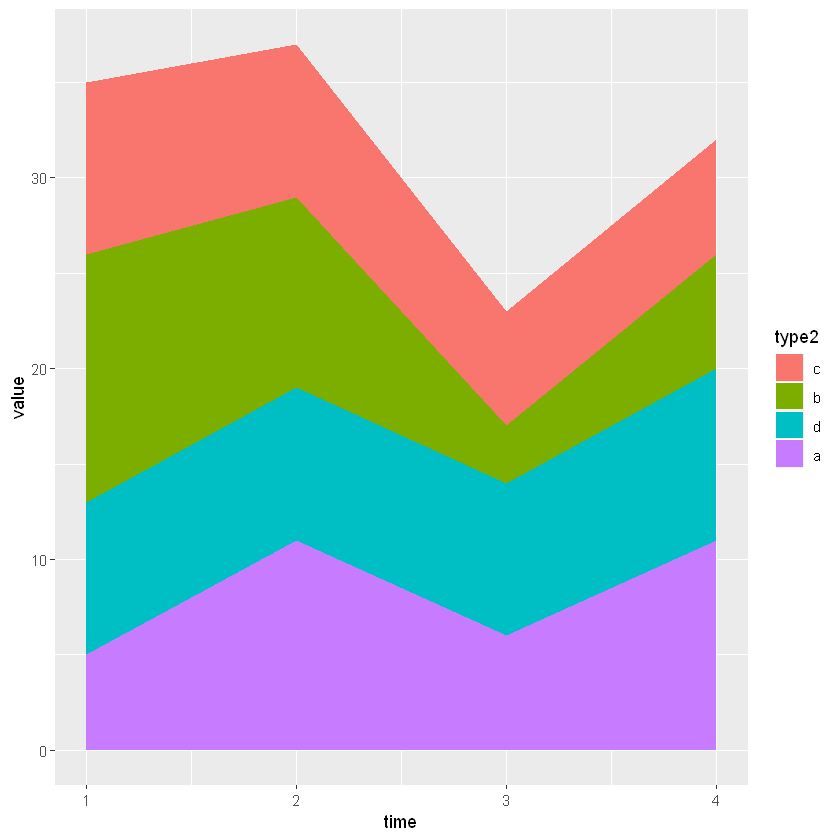

In [7]:
# Stacking order ----------------------------------------------

# The stacking order is carefully designed so that the plot
# matches the legend.

# You control the stacking order by setting the levels of the
# underlying factor. See the forcats package for convenient
# helpers.

series$type2 <- factor(series$type, levels = c('c', 'b', 'd', 'a'))

ggplot(series, aes(time, value)) +
  geom_area(aes(fill = type2))

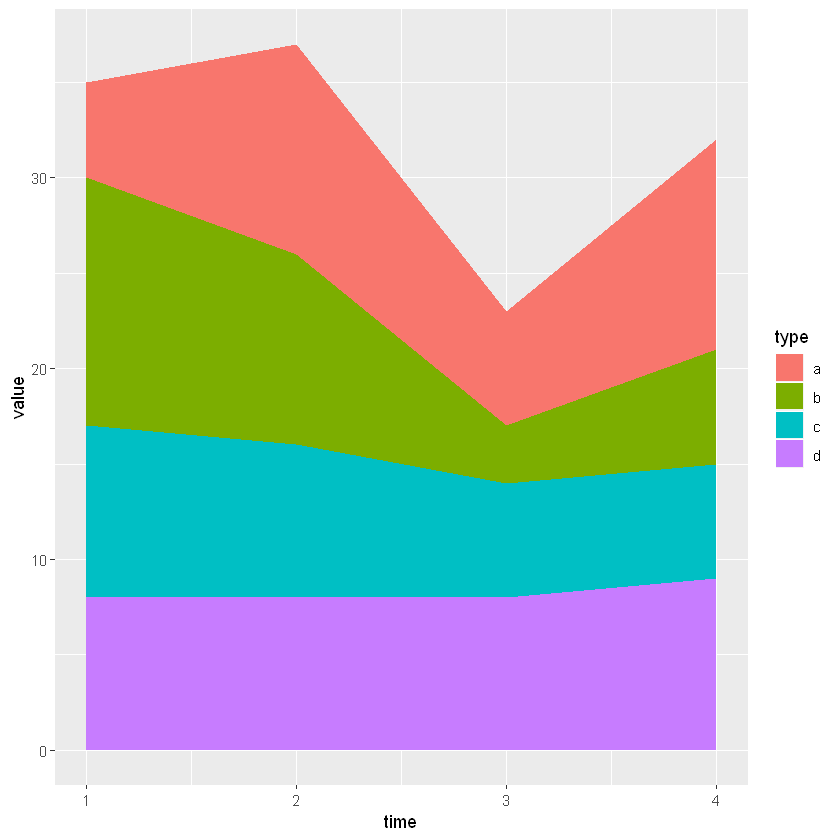

In [8]:
# You can change the order of the levels in the legend using 
# the scale

ggplot(series, aes(time, value)) +
  geom_area(aes(fill = type)) +
  scale_fill_discrete(breaks = c('a', 'b', 'c', 'd'))

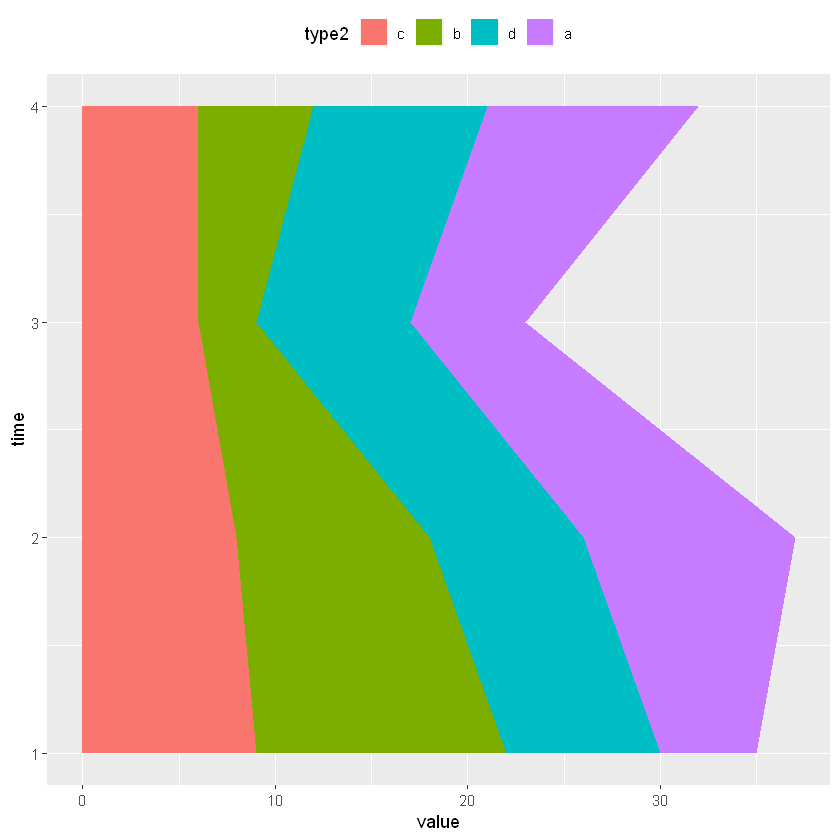

In [9]:
# If you've flipped the plot, use reverse = TRUE so the levels
# continue to match

ggplot(series, aes(time, value)) +
  geom_area(aes(fill = type2), 
            position = position_stack(reverse = TRUE)) +
  coord_flip() +
  theme(legend.position = "top")

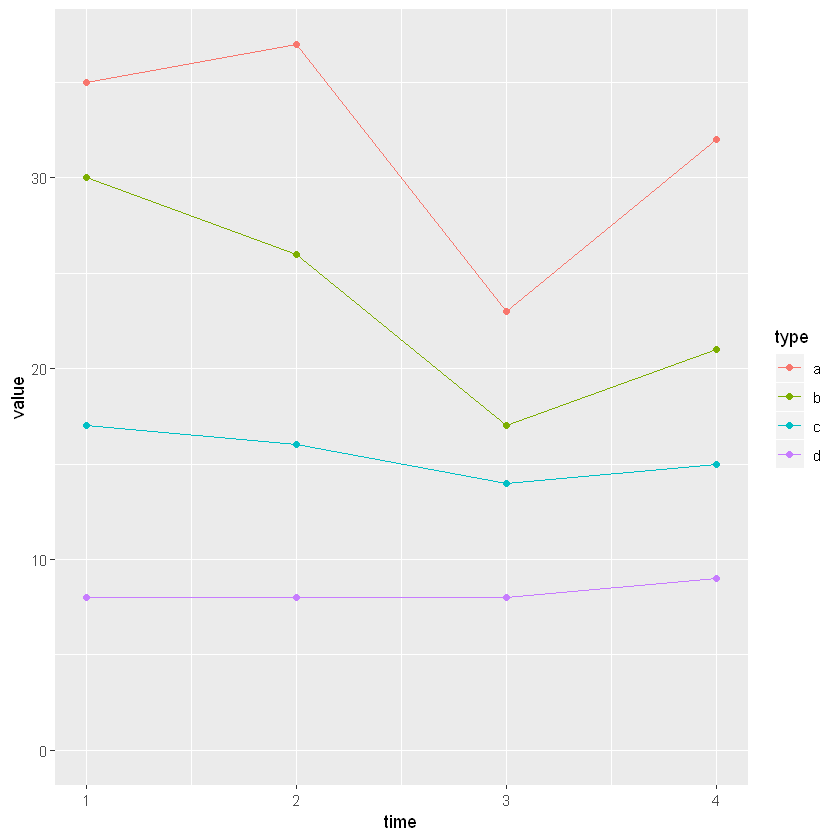

In [10]:
# Non - area plots --------------------------------------------

# When stacking across multiple layers, it's a good idea to 
# always set the 'group' aesthetic in the ggplot() call. This
# ensures that all layers are stacked in the same way.

ggplot(series, aes(time, value, group = type)) +
  geom_line(aes(colour = type), position = "stack") +
  geom_point(aes(colour = type), position = "stack")

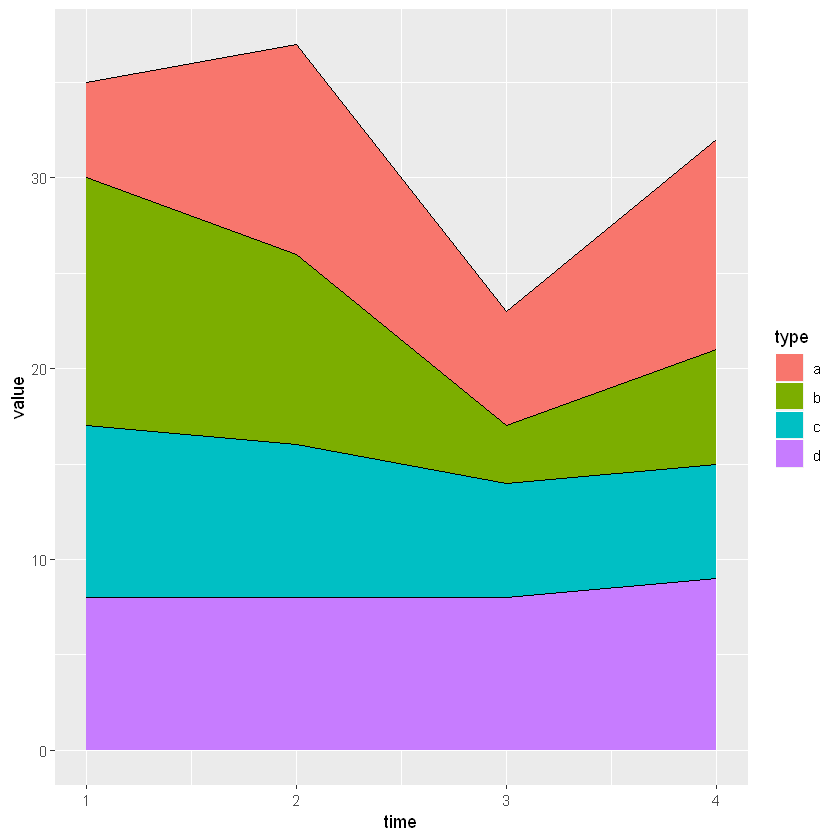

In [11]:
ggplot(series, aes(time, value, group = type)) +
  geom_area(aes(fill = type)) +
  geom_line(aes(group = type), position = "stack")

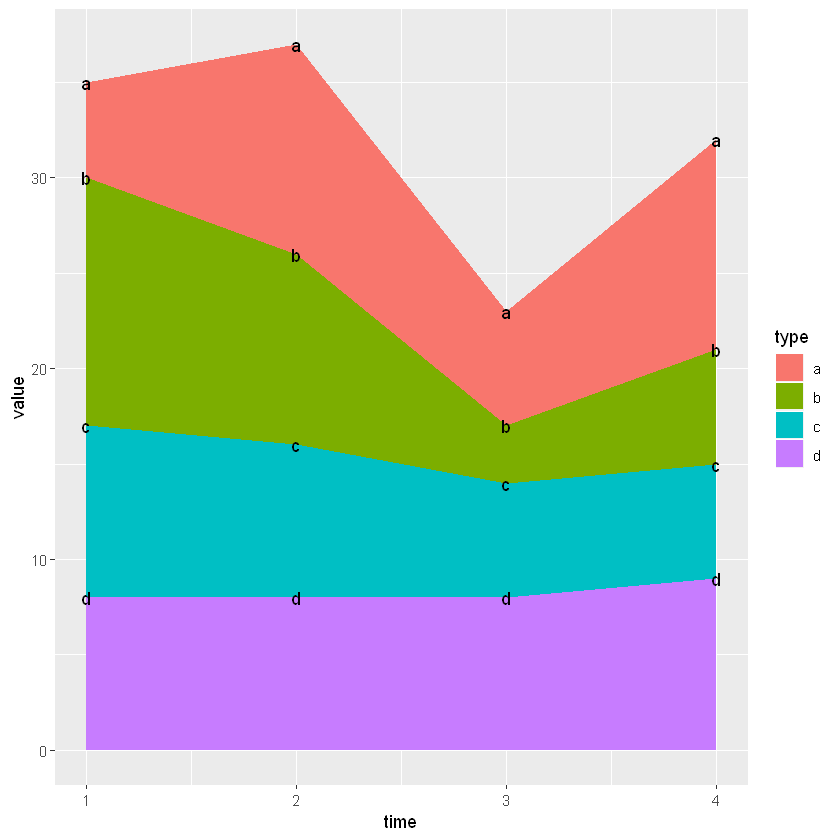

In [12]:
# You can also stack labels, but the default position is 
# suboptimal.

ggplot(series, aes(time, value, group = type)) +
  geom_area(aes(fill = type)) +
  geom_text(aes(label = type), position = "stack")

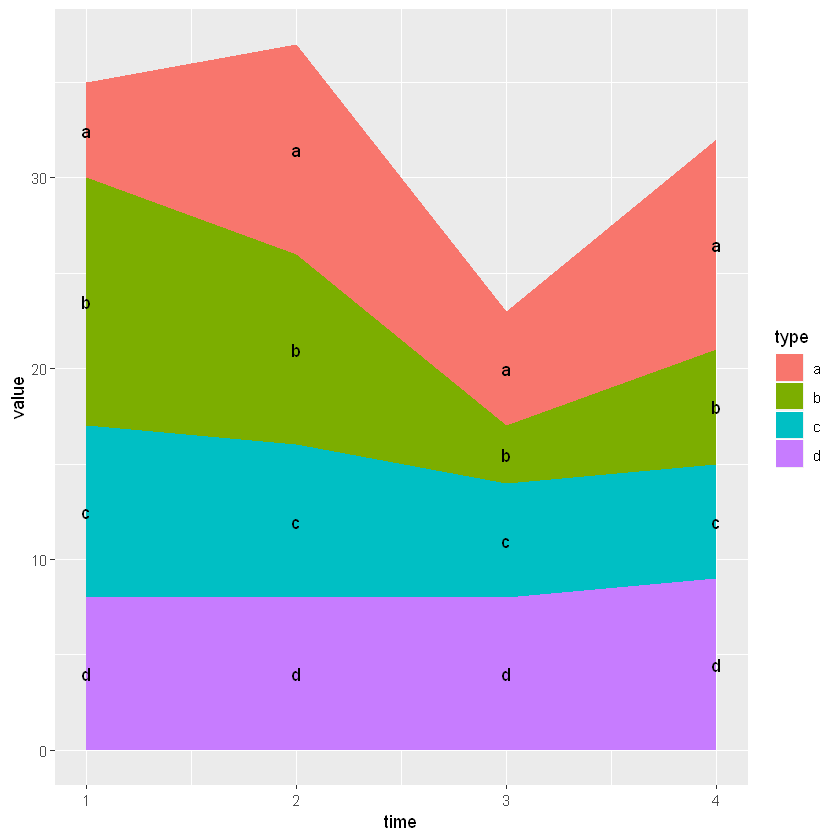

In [13]:
# You can override this with the vjust parameter. A vjust of 
# 0.5 will center the labels inside the corresponding area

ggplot(series, aes(time, value, group = type)) +
  geom_area(aes(fill = type)) +
  geom_text(aes(label = type), 
            position = position_stack(vjust = 0.5))

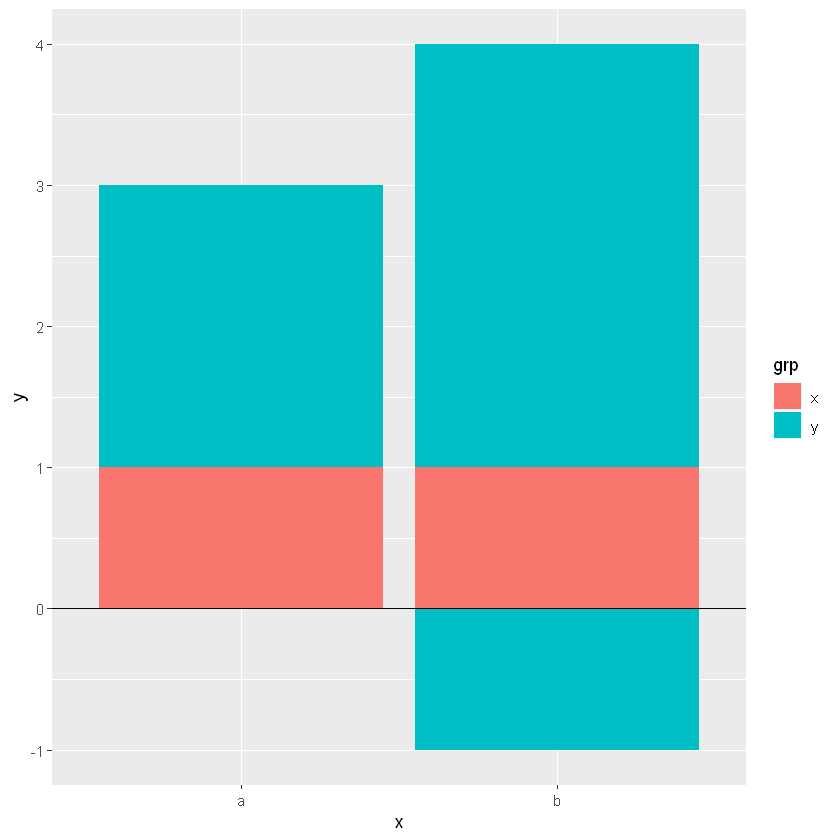

In [14]:
# Negative values ---------------------------------------------

df <- tibble::tribble(
  ~x, ~y, ~grp,
  "a", 1, "x",
  "a", 2, "y",
  "b", 1, "x",
  "b", 3, "y",
  "b", -1, "y"
)

ggplot(data = df, aes(x, y, group = grp)) +
  geom_col(aes(fill = grp), 
           position = position_stack(reverse = TRUE)) +
  geom_hline(yintercept = 0)

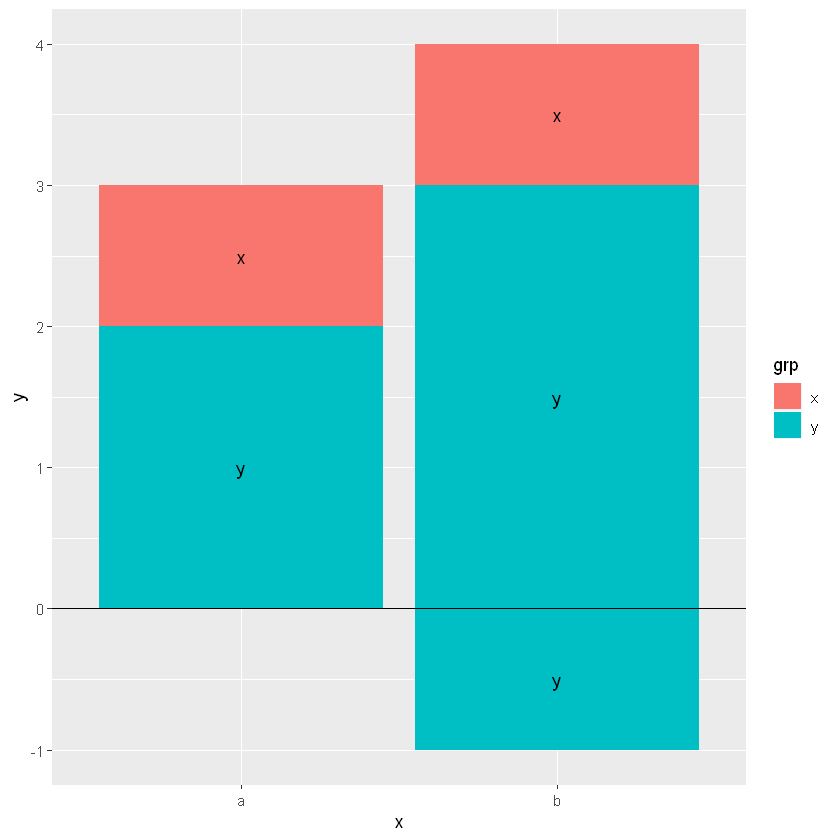

In [15]:
ggplot(data = df, aes(x, y, group = grp)) +
  geom_col(aes(fill = grp)) +
  geom_hline(yintercept = 0) +
  geom_text(aes(label = grp), 
            position = position_stack(vjust = 0.5))